<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/stat_dz_3_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# ANOVA

Сначала попробуем сравнить дисперсии "вручную"

Нулевая гипотеза: a1=a2=a3
Альтернативная гипотеза: !(a1=a2=a3)
p=0.030074661958256442 , Итог: отклоняем нулевую гипотезу


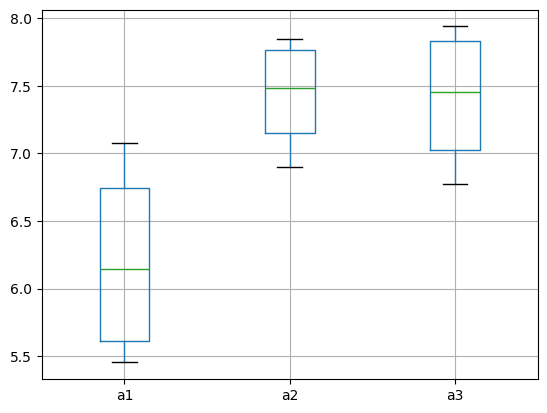

In [6]:
from scipy.stats import f
# Выборки которые надо сравнить
df = pd.DataFrame({
           'a1': [5.661,	6.629,	7.079,	5.453],
           'a2': [7.845,	6.9,	7.733,	7.232],
           'a3': [6.774,	7.106,	7.795,	7.938]
          })
df.boxplot()

print('Нулевая гипотеза:', '='.join(df))
print('Альтернативная гипотеза:', f'!({"=".join(df)})')

# общая средняя
grand_mean = df.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(df[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in df[group]) for group, group_mean in data.mean().items())

groups = df.shape[1]
dfb = groups - 1
dfw = df.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = f.sf(f_value, dfb, dfw)

print("p={} , Итог: {}".format(
    p,
    "отклоняем нулевую гипотезу" if p < 0.05 else "НЕ отклоняем нулевую гипотезу"
))

Рачпределения получились различные, что подтверждает график и главная вина лежит на а1

Теперь попробуем применить штатный метод

Однофакторный дисперсионный анализ (ANOVA)  — это тест, который используется для выяснения того, существует ли статистически значимая разница между средними значениями более чем одной группы.


Однофакторный дисперсионный анализ имеет следующие заданные нулевую и альтернативную гипотезы:

H0 (нулевая гипотеза): μ1 = μ2 = μ3 = … = μk (Это подразумевает, что средние значения всей совокупности равны)


H1 (нулевая гипотеза): утверждает, что будет по крайней мере одно среднее значение популяции, которое отличается от остальных.

In [7]:
from scipy.stats import f_oneway

#  the one-way ANOVA
f_oneway(df['a1'], df['a2'], df['a3'])

F_onewayResult(statistic=5.303702501348692, pvalue=0.03007466195825641)

Случилось чудо и мы пришли к тому же решению.


# Непараметрические методы

Критерий Краскела — Уоллиса предназначен для проверки равенства медиан нескольких выборок. Данный критерий является многомерным обобщением критерия Уилкоксона — Манна — Уитни. Критерий Краскела — Уоллиса является ранговым, поэтому он инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

Известен также под названиями: H-критерий Краскела — Уоллиса, однофакторный дисперсионный анализ Краскела — Уоллиса (англ. Kruskal — Wallis one-way analysis of variance)

In [8]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(df['a1'], df['a2'], df['a3'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=5.654, p=0.059
Same distributions (fail to reject H0)


А этот критерий назло всем утверждает, что распределения одинаковые, но мы не сдаёмся и применяем следующий

Критерий Фридмана (англ. Friedman test) — непараметрический статистический тест, разработанный американским экономистом Милтоном Фридманом. Является обобщением критерия Уилкоксона и применяется для сопоставления c условий измерения для n объектов с ранжированием по индивидуальным значениям измерений. Непараметрический аналог дисперсионного анализа с повторными измерениями ANOVA.

Он позволяет проверять гипотезы о различии более чем двух (т.е. от 3-х и до 100) повторных измерений по уровню выраженности изучаемой переменной.

Критерий более эффективен, чем дисперсионный анализ в случае малых выборок (до 30 объектов в выборке) и распределений, отличных от нормального. Он основан на ранжировании повторных измерений для каждого объекта выборки. Проверяется при помощи критерия хи-квадрат. При справедливости нулевой гипотезы значения статистики Фридмана (критерия Фридмана) малы, т.е. эмпирический критерий меньше, чем критический. И это означает, что различия случайны и недостоверны.

Критерий Фридмана позволяет установить, что величины показателей от условия к условию изменяются, но при этом не указывает на направление изменений и в этом смысле он похож на критерий знаков.

Критерий Фридмана является обобщением критерия Вилкоксона на большее, чем два, количество условий измерения, при этом ранжируются не абсолютные величины сдвигов, а сами индивидуальные значения измерений.

Нулевая гипотеза H0 = {между полученными в разных условиях показателями (т.е. между проверяемыми выборками) существуют лишь случайные различия}.

Альтернативная гипотеза H1 = {между полученными в разных условиях показателями (т.е. между проверяемыми выборками) имеются существенные неслучайные различия}.

Ранжируются индивидуальные значения показателей (повторные измерения) для каждого экземпляра выборки в порядке убывания признака (ранжирование параметров каждой строки).

In [9]:

# Friedman test

from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(df['a1'], df['a2'], df['a3'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=6.500, p=0.039
Different distributions (reject H0)


Здесь всё опять хорошщо и распределения различны. Сумировав и усреднив результаты решения задачи при помощи нескольких критериев можно утверждать, что распределения действительно различны. ура